# Graded Quiz

## Appliances Energy Prediction 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\Sharon\\HAMOYE\\energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
data.shape

(19735, 29)

In [5]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# Dropping the date and light variables as instructed
data.drop(['date', 'lights'], axis=1, inplace=True)

In [7]:
data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
corr = data.corr()

In [9]:
# #select a sample of the dataset
# simple_linear_reg = data[[Relative_Compactness, 'Cooling_Load']]
#                        .sample(15, random_state=2)
# #regression plot
# sns.regplot(x="Relative_Compactness", y="Cooling_Load",
#             data=simple_linear_reg)

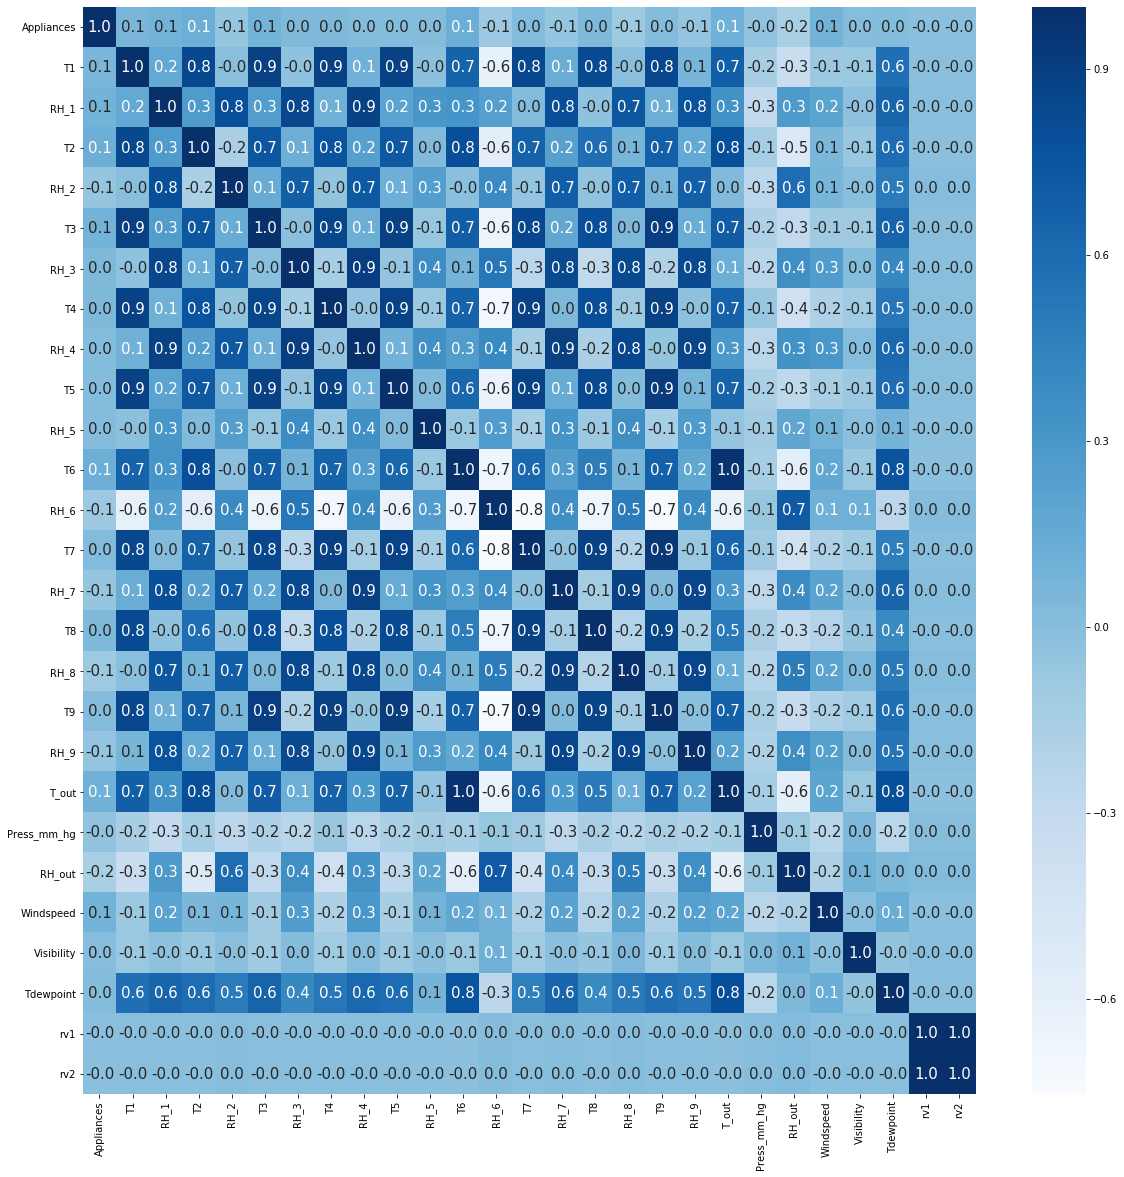

In [10]:
plt.rcParams['figure.figsize']=(20,20)
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [11]:
# Importing all used packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [37]:
from sklearn.preprocessing import MinMaxScaler  # Module that normalises data

scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features = norm_data.drop(columns=['Appliances'])
target = norm_data['Appliances']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Quiz Answers alongside other predictions

In [39]:
# Linear Regression Model
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
linear_model_preds = linear_model.predict(x_test)

# R^2 score values
print("Training set score: {:.2f}".format(linear_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(linear_model.score(x_test, y_test)))

Training set score: 0.14
Test set score: 0.15


In [109]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, linear_model_preds))
round(rmse, 3)

0.088

In [110]:
# Root Mean Square Error
rss = np.sum(np.square(y_test - linear_model_preds))
round(rss, 3)


45.346

In [111]:
mae = mean_absolute_error(y_test, linear_model_preds)
round(mae, 3) 

0.05

In [93]:
# Linear model to calculate line of best fit for x=T2 and y=T6
df = norm_data[['T2', 'T6']]
x = df['T2']
y = df['T6']

In [95]:
x = pd.Series(x).array
x = np.array(x).reshape((-1,1))

y = pd.Series(y).array

In [118]:
model = LinearRegression() 
model.fit(x, y)

# R^2 score value
print(model.score(x, y))

0.6447768247461264


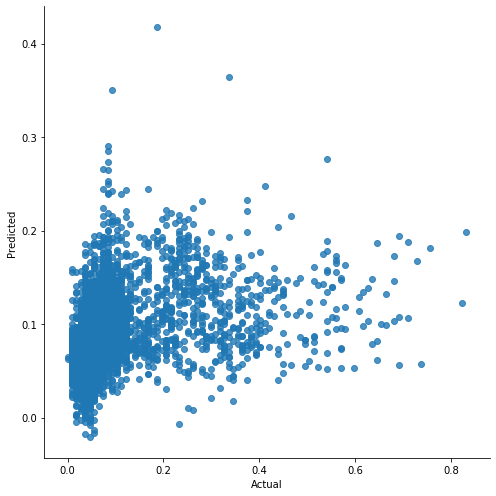

In [40]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': linear_model_preds})
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)

The plot shows strong non-linearity between the actual and predicted values

> Regularisation Models:
- Lasso
- Ridge
- ElasticNet

In [119]:
# Comparing to Lasso with alpha value of 0.001

lasso_reg = Lasso(alpha=0.001, random_state=2)

lasso_reg.fit(x_train, y_train)

lasso_reg_preds = lasso_reg.predict(x_test)

print("Training set score: {:.2f}".format(lasso_reg.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(x_test, y_test)))

Training set score: 0.02
Test set score: 0.03


In [107]:
# New weight values
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [115]:
# RMSE value
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_preds))
round(rmse, 3)

0.094

In [102]:
# Comparing to Ridge with alpha=0.4
ridge_reg = Ridge(alpha=0.4, random_state=3)

ridge_reg.fit(x_train, y_train)

ridge_reg_preds = ridge_reg.predict(x_test)

print("Training set score: {:.2f}".format(ridge_reg.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(x_test, y_test)))

Training set score: 0.14
Test set score: 0.15


In [112]:
# RMSE value
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_preds))
round(rmse, 3)

0.088

In [19]:
# Grid SearchCV to get the best alpha value for the Ridge Regularisation 
params = {'alpha': np.logspace(-3,3,20)}
grid = GridSearchCV(ridge_reg, params, cv=3, verbose=True, n_jobs=3)
grid.fit(x_train, y_train)
grid_pred = grid.predict(x_test)

print("Training set score: {:.2f}".format(grid.score(x_train, y_train)))
print("Test set score: {:.2f}".format(grid.score(x_test, y_test)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Training set score: 0.14
Test set score: 0.15


[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   16.3s finished


In [20]:
# ElasticNet
elastic_net = ElasticNet(alpha=0.00001, l1_ratio=0.5, random_state = 4)

elastic_net.fit(x_train, y_train)

elastic_net_preds = elastic_net.predict(x_test)

print("Training set score: {:.2f}".format(elastic_net.score(x_train, y_train)))
print("Test set score: {:.2f}".format(elastic_net.score(x_test, y_test)))

Training set score: 0.14
Test set score: 0.15


The perfomance of the Linear models didn't look good

### Using the Ensemble and KNeighbors Regression Models

In [43]:
# Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=8) # This model performed best so far
forest.fit(x_train, y_train)
forest_preds = forest.predict(x_test)

print("Training set score: {:.2f}".format(forest.score(x_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(x_test, y_test)))

Training set score: 0.94
Test set score: 0.56


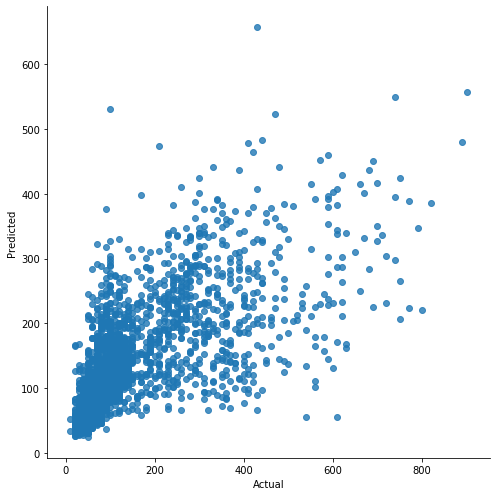

In [22]:
# Plotting to test for linearity on the actual and predicted values of the random forest regressor
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': forest_preds})
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)

The plot shows a partly linear relationship between the actual and predicted y values

In [44]:
boost = GradientBoostingRegressor(learning_rate=0.5)
boost.fit(x_train, y_train)
boost_preds = boost.predict(x_test)

print("Training set score: {:.2f}".format(boost.score(x_train, y_train)))
print("Test set score: {:.2f}".format(boost.score(x_test, y_test)))

Training set score: 0.59
Test set score: 0.32


In [45]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)

print("Training set score: {:.2f}".format(knn.score(x_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(x_test, y_test)))

Training set score: 0.54
Test set score: 0.27


>It appears Random Forest was the only model with a better accuracy score, although it was most likely overfitting. The plot in the next cell will show the features the model used most for its predictions in a descending order

In [46]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')

<Figure size 432x216 with 0 Axes>

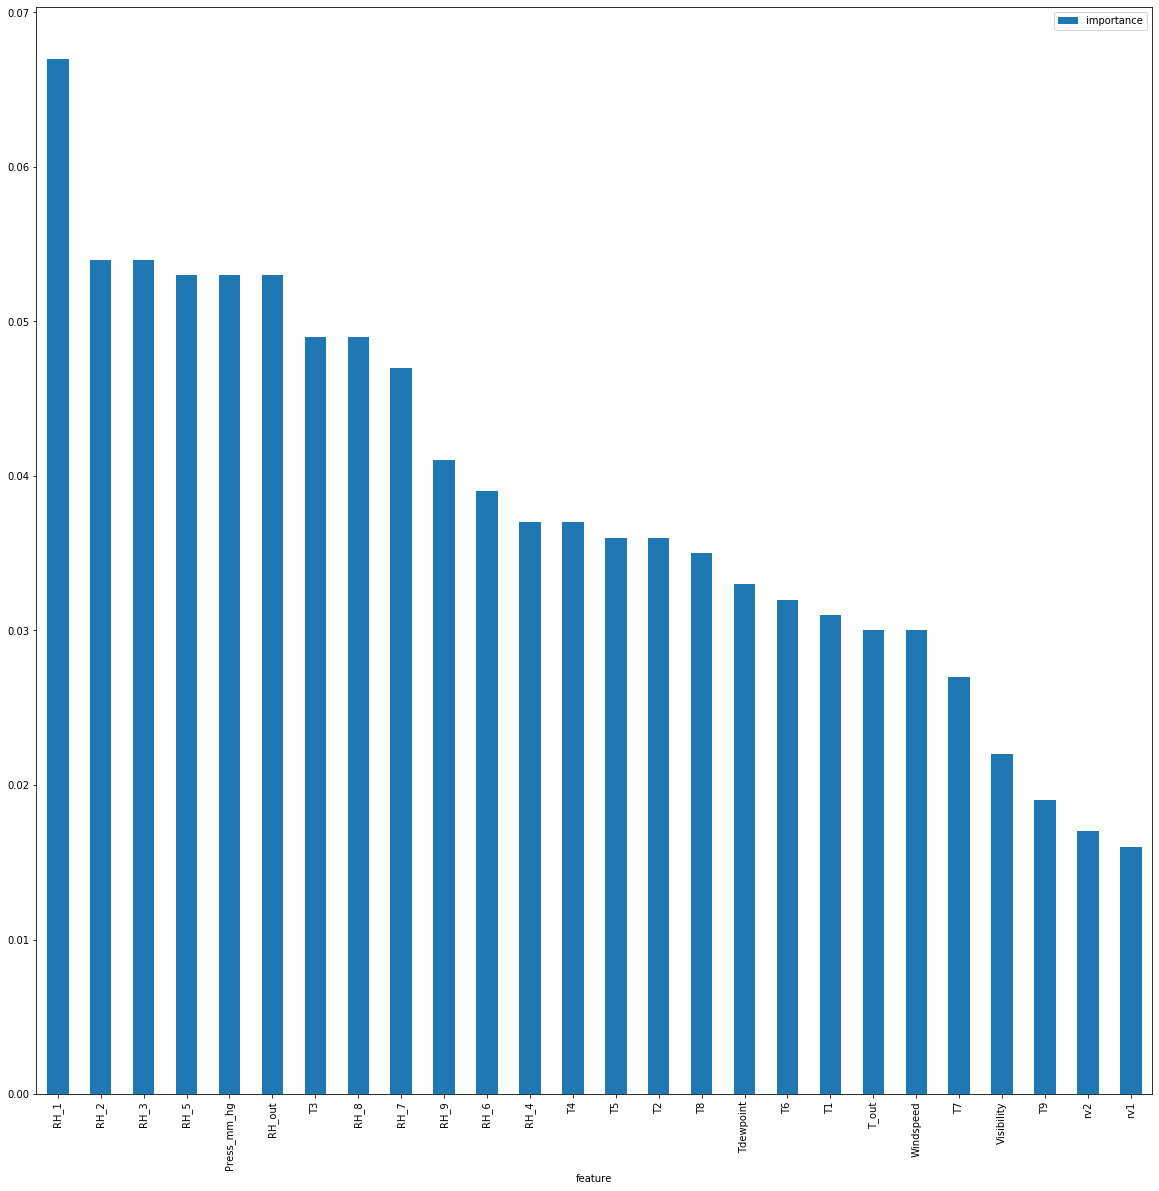

In [47]:
plt.figure(figsize=(6, 3)) 
importances.plot.bar()

### Calculating the performance of all models, using MAE, RSS and RMSE

In [48]:
def mae(model, predictions):
    """To return the mean absolute error value for any model prediction"""
    mae = mean_absolute_error(y_test, predictions)
    return round(mae, 3)

In [49]:
def rss(model, predictions):
    """To return the residual sum of squares for any model prediction"""
    rss = np.sum(np.square(y_test - predictions))
    return round(rss, 3)

In [50]:
def rmse(model, predictions):
    """To return the root mean square value for any model prediction"""
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return round(rmse, 3)  

#### Residual Sum of Squares (RSS) values

In [54]:
print('Lasso rss value: {}'.format(rss(lasso_reg, lasso_reg_preds)))
print('Ridge rss value: {}'.format(rss(ridge_reg, ridge_reg_preds)))
print('Linear Reg. rss value: {}'.format(rss(linear_model, linear_model_preds)))
print('Gradient Boosting rss value: {}'.format(rss(boost, boost_preds)))
print('Random Forest rss value: {}'.format(rss(forest, forest_preds)))

Lasso rss value: 45.373
Ridge rss value: 45.42
Linear Reg. rss value: 45.346
Gradient Boosting rss value: 36.279
Random Forest rss value: 23.218


#### Mean Absolute Error (MAE) values

In [55]:
print('Lasso mae value: {}'.format(mae(lasso_reg, lasso_reg_preds)))
print('Ridge mae value: {}'.format(mae(ridge_reg, ridge_reg_preds)))
print('Linear Reg. mae value: {}'.format(mae(linear_model, linear_model_preds)))
print('Gradient Boosting mae value: {}'.format(mae(boost, boost_preds)))
print('Random Forest mae value: {}'.format(mae(forest, forest_preds)))

Lasso mae value: 0.05
Ridge mae value: 0.05
Linear Reg. mae value: 0.05
Gradient Boosting mae value: 0.042
Random Forest mae value: 0.03


### Comparing the Regularisation weights

In [57]:
def get_weights_df(model, feat, col_name):
    """ This function returns the weight of every feature
        Args:
            model: Name of the model used
            feat: The independent training features e.g: x_train
            col_name: Preferred column name for the weight values
            
        Returns:
            weight value (co-efficient) of each feature
    """
    
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
  
    return weights_df


In [58]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
elastic_net_weights_df = get_weights_df(elastic_net, x_train, 'Elastic_Net_weight')

In [59]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elastic_net_weights_df, on='Features')

In [60]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight,Elastic_Net_weight
0,rv2,-6.347156e+10,0.000723,0.000000,0.090952
1,RH_2,-4.566222e-01,-0.358103,-0.415696,-461.804605
2,T_out,-3.218423e-01,-0.206747,-0.203818,-331.045127
3,T2,-2.361131e-01,-0.161609,-0.203776,-246.440949
4,T9,-1.899177e-01,-0.186556,-0.182601,-202.971997
5,RH_8,-1.575747e-01,-0.155309,-0.158275,-168.529101
6,RH_out,-7.767868e-02,-0.035250,-0.026659,-77.771683
7,RH_7,-4.462568e-02,-0.047704,-0.041139,-47.761714
8,RH_9,-3.980029e-02,-0.043123,-0.038487,-42.853229
9,T5,-1.566246e-02,-0.024406,-0.019311,-17.600891


# Predicting the energy efficiency of buildings (Lesson Work)

In [2]:
data = pd.read_excel('C:\\Users\\Sharon\\HAMOYE\\ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
headers = {
    'X1': 'Relative_Compactness',
          'X2': 'Surface_Area',
          'X3': 'Wall_Area',
          'X4': 'Roof_Area',
          'X5': 'Overall_Height',
          'X6': 'Orientation',
          'X7': 'Glazing_Area',
          'X8': 'Glazing_Area_Distribution', 
          'Y1': 'Heating_Load', 
          'Y2': 'Cooling_Load'
          }
data = data.rename(columns=headers)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative_Compactness         768 non-null float64
Surface_Area                 768 non-null float64
Wall_Area                    768 non-null float64
Roof_Area                    768 non-null float64
Overall_Height               768 non-null float64
Orientation                  768 non-null int64
Glazing_Area                 768 non-null float64
Glazing_Area_Distribution    768 non-null int64
Heating_Load                 768 non-null float64
Cooling_Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
corr = data.corr()
corr

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing_Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


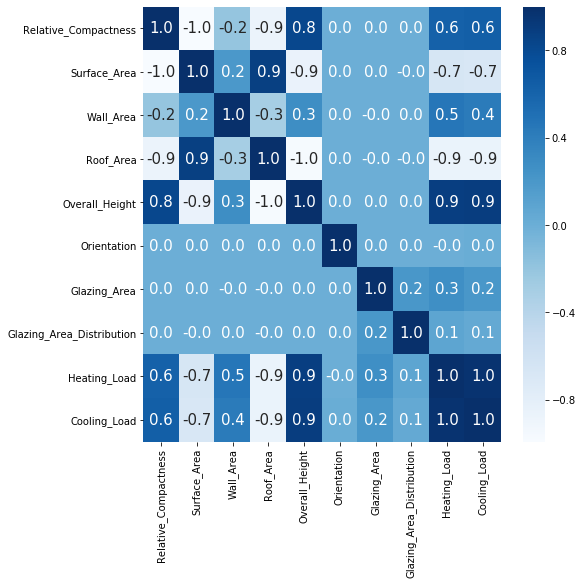

In [6]:
plt.rcParams['figure.figsize']=(8,8)
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
norm_data = pd.DataFrame(scale.fit_transform(data), columns = data.columns)

## Linear Regression

In [10]:
# predicting for the Heating Load
features = norm_data.drop(['Heating_Load', 'Cooling_Load'], axis=1)
target = norm_data['Heating_Load']

from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 1)

In [11]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

In [12]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.063

In [13]:
# R^2 Score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [14]:
# Residual sum of squares
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.825

In [15]:
# Root Mean Square Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

> **Regularisation**

- Lasso
- Ridge
- Elastic Net

In [16]:
# LASSO

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
predicted_values = lasso_reg.predict(x_test)

#MAE
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.066

In [18]:
# RIDGE

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
predicted_values = ridge_reg.predict(x_test)

#MAE
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.064

In [20]:
#comparing the effects of regularisation

def get_weights_df(model, feat, col_name):
    """ This function returns the weight of every feature
        Args:
            model: Name of the model used
            feat: The independent training features
            col_name: Preferred column name for the weight values
            
        Returns:
            weight value (co-efficient) of each feature
    """
    
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
  
    return weights_df


In [21]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [22]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.01, random_state = 6)
elastic_net.fit(x_train, y_train)
predicted_values = elastic_net.predict(x_test)

In [31]:
#MAE
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.064

In [32]:
elastic_net_weights_df = get_weights_df(elastic_net, x_train, 'Elastic Net')
final_weights = pd.merge(final_weights, elastic_net_weights_df, on='Features')

In [33]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight,Elastic Net
0,Surface_Area,-5.620066e+12,-0.062275,0.000000,-0.050461
1,Relative_Compactness,-5.855289e-01,-0.283471,-0.027719,-0.269397
2,Orientation,3.376007e-03,0.003369,0.000000,0.003298
3,Glazing_Area_Distribution,2.662706e-02,0.029088,0.021431,0.029052
4,Glazing_Area,2.148657e-01,0.212449,0.206132,0.212227
5,Overall_Height,3.945312e-01,0.442467,0.463482,0.444008
6,Wall_Area,3.278372e+12,0.103061,0.200087,0.104050
7,Roof_Area,4.215050e+12,-0.163192,-0.000000,-0.159890


## Multi Output Regressor

Since the problem requires predicting for the "heating load" and the "cooling load", then it is a multi output regression problem. The MultiOutputRegressor module will be employed.

In [34]:
features = norm_data.drop(['Heating_Load', 'Cooling_Load'], axis = 1)
target = norm_data[['Heating_Load', 'Cooling_Load']]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.multioutput import MultiOutputRegressor

# Default value for alpha = 0.1
ridge = MultiOutputRegressor(Ridge(random_state = 3))

ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score: 0.90
Test set score: 0.89


In [37]:
# alpha = 0.01

ridge001 = MultiOutputRegressor(Ridge(alpha = 0.01, random_state = 4))
ridge001.fit(x_train, y_train)
pred001 = ridge001.predict(x_test)
print("Training set score: {:.2f}".format(ridge001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(x_test, y_test)))


Training set score: 0.90
Test set score: 0.90


In [38]:
# alpha = 0.5

ridge05 = MultiOutputRegressor(Ridge(alpha = 0.5, random_state = 5))
ridge05.fit(x_train, y_train)
pred05 = ridge05.predict(x_test)
print("Training set score: {:.2f}".format(ridge05.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge05.score(x_test, y_test)))

Training set score: 0.90
Test set score: 0.89


In [39]:
# MAE for alpha = 0.01
mae = mean_absolute_error(y_test, pred001)
round(mae, 3) 

0.06

In [40]:
# MAE for alpha = 0.5
mae = mean_absolute_error(y_test, pred05)
round(mae, 3) 

0.062

In [41]:
# Residual sum of squares for alpha = 0.01
rss = np.sum(np.square(y_test - pred001))
round(rss, 3)

Heating_Load    1.132
Cooling_Load    1.197
dtype: float64

In [42]:
# Residual sum of squares for alpha = 0.5
rss = np.sum(np.square(y_test - pred05))
round(rss, 3)

Heating_Load    1.177
Cooling_Load    1.237
dtype: float64

In [43]:
# Root Mean Square value for alpha = 0.01
rmse = np.sqrt(mean_squared_error(y_test, pred001))
round(rmse, 3)

0.087

In [44]:
# Root Mean Square value for alpha = 0.5
rmse = np.sqrt(mean_squared_error(y_test, pred05))
round(rmse, 3)

0.089

>`ridge001 model of alpha = 0.01, performed best`